# 5.1.3c Curvas ROC

**Propósito:** $\;$ estudiar el comportamiento de un clasificador binario $\,\hat{y}_{\tau}(\boldsymbol{x})=\mathbb{I}(p(y=1\mid\boldsymbol{x})\geq 1-\tau)\,$ en función de $\,\tau$

**Curva Receiver Operating Characteristic (ROC):** $\;$ gráfica de la $\operatorname{TPR}_{\tau}$ en función de la $\operatorname{FPR}_{\tau}$, obtenida al variar $\tau$ de $0$ a $1$

**Ejemplo:** $\;$ curvas ROC típicas de dos clasificador, A y B, siendo el A claramente mejor que el B

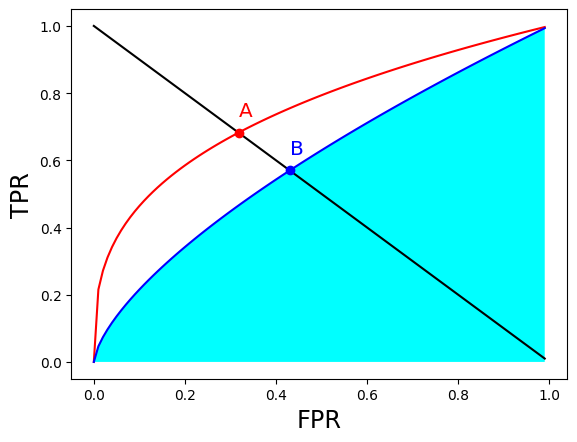

In [1]:
import numpy as np; import matplotlib.pyplot as plt
fA = np.vectorize(lambda x: x**(1.0/3)); fB = np.vectorize(lambda x: x**(2.0/3)); x = np.arange(0, 1, 0.01)
plt.plot(x, fA(x), 'r-'); plt.plot(x, fB(x), 'b-'); plt.fill_between(x, fB(x), 0, facecolor='cyan')
plt.plot(x, 1-x, 'k-')
inter_a = 0.3177; # found using scipy.optimize.fsolve(x**(1.0/3)+x-1, 0)
inter_b = 0.4302; # found using scipy.optimize.fsolve(x**(2.0/3)+x-1, 0)
plt.plot(inter_a, fA(inter_a), 'ro'); plt.plot(inter_b, fB(inter_b), 'bo')
plt.text(inter_a, fA(inter_a) + 0.05, 'A', color='red', size='x-large')
plt.text(inter_b, fB(inter_b) + 0.05, 'B', color='blue', size='x-large')
plt.xlabel('FPR', size='xx-large'); plt.ylabel('TPR', size='xx-large');

En la esquina inferior izquierda tenemos $\operatorname{FPR}_0=\operatorname{TPR}_0=0$ mientras que, en la superior derecha, $\operatorname{FPR}_1=\operatorname{TPR}_1=1$. De un clasificador aleatorio uniforme, esto es, tal que $p(y=1\mid\boldsymbol{x})=\operatorname{Unif}(0, 1)$, cabe esperar una curva ROC diagonal:
$$\begin{align*}
\operatorname{FPR}_{\tau}&=\frac{\operatorname{FP}_{\tau}}{N}\approx\frac{N\cdot\tau}{N}=\tau\\
\operatorname{TPR}_{\tau}&=\frac{\operatorname{TP}_{\tau}}{P}\approx\frac{P\cdot\tau}{P}=\tau
\end{align*}$$
Obviamente, es de esperar que nuestros clasificadores exhiban curvas ROC claramente por encima de la diagonal. En general obtendremos curvas monótonamente crecientes pues es claro que, si $\tau'\leq\tau$, entonces:
$$\operatorname{FPR}_{\tau'}\leq\operatorname{FPR}_{\tau}\quad\text{y}\quad\operatorname{TPR}_{\tau'}\leq\operatorname{TPR}_{\tau'}$$
Idealmente, un clasificador "perfecto" asigna $p(y=1\mid\boldsymbol{x})=1$ a todas las muestras positivas; $0$ a las negativas. Luego, su curva ROC es en realidad una recta que va de la esquina superior izquierda ($\tau=0$) a la superior derecha ($\tau=1$):
$$\begin{align*}
\operatorname{FPR}_0&=\frac{\operatorname{FP}_0}{N}=\frac{0}{N}=0&&&
\operatorname{TPR}_0&=\frac{\operatorname{TP}_0}{P}=\frac{P}{P}=1\\
\operatorname{FPR}_1&=\frac{\operatorname{FP}_1}{N}=\frac{N}{N}=1&&&
\operatorname{TPR}_1&=\frac{\operatorname{TP}_1}{P}=\frac{P}{P}=1%
\end{align*}$$

## Resumen mediante un escalar

La calidad de una curva ROC suele resumirse mediante algún escalar para facilitar su comparación con otras curvas. Por lo general se emplea el **área bajo la curva (AUC, area under curve)**; por ejemplo, el área azul para el clasificador B de la figura. Una alternativa a la AUC es el **equal error rate (EER)** o **cross-over rate**, definido como el valor de $\tau$ tal que $\operatorname{FPR}_{\tau}=\operatorname{FNR}_{\tau}$. Como $\operatorname{FNR}_{\tau}=1-\operatorname{TPR}_{\tau}$, este valor viene dado por el punto en el que la curva ROC curva cruza la diagonal que va de la esquina superior izquierda a la inferior derecha. Por ejemplo, en la figura, se observa que la EER de A (rojo) es mejor (menor) que la de B (azul).

## Clases desequilibradas

Algunos problemas presentan clases muy desequilibradas; por ejemplo, en recuperación de información, el conjunto de negativos (documentos irrelevantes) es mucho mayor que el de positivos (relevantes). En tales casos, la TPR y la FPR no se ven afectadas por desequilibrios de clase ya que son fracciones de positivos y negativos, respectivamente. No obstante, un pequeño aumento de FPR supone un gran número de falsos positivos adicionales, cosa que no tiene interés práctico, por lo que la curva ROC solo tiene interés para valores pequeños de FPR.